# The Spark Foudation - Data Science & Business Analytics Internship 

## Task 1 - Prediction using Supervised ML

### Author: Khushboo Bafna 

### Batch: January 2022

### Simple Linear Regression 
In this task we will be predicting the percentage of a student based on the no. of study hours.
It determines the linear relationship between the dependent (y) and a independent (X) variable. It is also known as, Simple Linear Regression (SLR). The mathematical equation is given as:

y = β0 + β1.x + ε

where, 

y   =  Dependent variable <br>
x   =  Independent variable<br>
β<sub>0</sub>  =  Y-intercept (value of y when x = 0)<br>
β<sub>1</sub>  =  Beta coefficient of x <br>
ε   =  Random error component<br>

###### Importing the libraries 

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

###### Reading dataset

In [6]:
dataframe=pd.read_csv("http://bit.ly/w-data")
dataframe.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Let us now see the number of variables and observations in the data.**

In [8]:
dataframe.shape

(25, 2)

**Interpretation:** The data has 25 observations and 2 variables.

**Get a concise summary of the DataFrame.**

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Interpretation:** The variables are numerical

###### Outlier Analysis and Treatment 

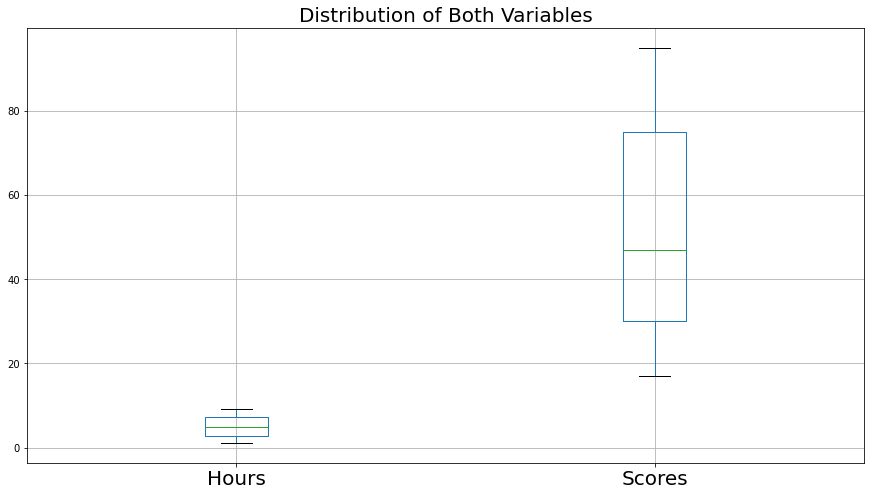

In [12]:
plt.figure(figsize =(15,8))
dataframe.boxplot()
plt.title('Distribution of Both Variables', fontsize=20)
plt.xticks(fontsize=20)
plt.show()

**Interpretation :** There are no outliers in the data. Therefore no treatment required. 

###### Missing Value Analysis and Treatment 

In [14]:
dataframe.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Interpretation :** There are no null values. Therefore no treatment required. 

###### **Splitting the data into training and test sets** 

In [26]:
# assigning variables 
X=dataframe['Hours']
y=dataframe['Scores']

# converting pandas series to numpy array
X_arr=np.array(X)
y_arr=np.array(y)

# reshaping to proper dimensions 
X=X_arr.reshape(-1,1)
y=y_arr.reshape(-1,1)

# splitting into training and test subsets
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=10, test_size=0.3)

###### Checking the dimensions of train and test subset

In [27]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (17, 1)
y_train (17, 1)
X_test (8, 1)
y_test (8, 1)


###### Building the Simple Linear Regression Model 

In [28]:
slr_model=LinearRegression()
slr_model.fit(X_train, y_train)

LinearRegression()

###### Score of the model 

In [33]:
print("Model Score: ", slr_model.score(X_train, y_train)*100)

Model Score:  95.7959306301218


###### Slope and Intercept of the model

In [44]:
print("Slope: ", slr_model.coef_[0][0])
print("Intercept: ", slr_model.intercept_[0])

Slope:  10.067903906503629
Intercept:  1.2139649388594052


The output of the regression model returns the value of slope (β<sub>1</sub>) and Intercept (β<sub>0</sub>). 

**Intercept (β<sub>0</sub>) =  1.21**, indicates that if the Study hours is zero, then the average Percentage is  1.21.


**The slope of 'No. of Study Hours' (β<sub>1</sub>) = 10.07**, indicates that by increasing the no. of study hours by 1%, the average Percentage increases by 10.07.



Thus, the equation of the line given by the model is:
<p style='text-indent:25em'> <strong> 
    
Percentage = 1.21 + 10.07*(No. of hours) </strong>  </p>

###### Creating new dataframe to show actual and predicted Values 

In [39]:
# Calcuolating the predicted values 
y_pred=slr_model.predict(X_test)

# Creating the Dataframe 
act_pred_df=pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
act_pred_df

,Actual,Predicted
0,20,16.315821
1,47,52.560275
2,42,34.438048
3,27,33.431257
4,41,46.519533
5,69,75.716454
6,17,12.288659
7,60,56.587436


**Interpretation :** There is slight difference in actual and predicted values. That we also saw through score of the model.

###### Mean Absolute Error 


In [49]:
print('Mean Absolute Error: ', round(mean_absolute_error(y_test, y_pred),2))

Mean Absolute Error:  5.45


In [59]:
pred_score=slr_model.predict([[9.25]])
print('Predicted score if a student studies for 9.25 hrs/day is ', round(pred_score[0][0],2))

Predicted score if a student studies for 9.25 hrs/day is  94.34
